# Seurat harmony, cluster and find Marker

In [1]:
library(tidyverse)
library(harmony)
library(Seurat)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: Rcpp

Loading required package: SeuratObject

Loading required package: sp

‘SeuratObject’ was built under R 4.3.2 but the current version is
4.3.3; it is recomended that you reinstall ‘SeuratObject’ as the ABI
for R may have changed

‘SeuratObject’ was built with package ‘Matrix’ 1.6.3 but the current
version is 1.6.5; it is recomended that you reinstall ‘SeuratObject’ as
the ABI for ‘Matrix’ may have changed


Attaching package: ‘SeuratObject’


In [2]:
packageVersion("harmony")

[1] ‘1.2.0’

In [3]:
adata_count = read.csv('GSE167232_mtb_integrated.csv.gz',row.names = 1)
adata_count %>% dim

[1] 22626 17101

In [4]:
df_ann = read.csv("GSE167232_mtb_integrated_meta.csv")
df_ann %>% colnames
df_ann %>% head(2)
# df_ann %>% group_by(orig.ident) %>% count
# df_ann %>% group_by(MULTI_ID) %>% count
# df_ann %>% group_by(Treatment) %>% count
# df_ann %>% group_by(Protein) %>% count
# df_ann %>% group_by(Batch) %>% count
df_ann %>% group_by(seurat_clusters,cell_type) %>% count
df_ann %>% dim

[1] "cell_id"              "orig.ident"           "nCount_RNA"          
 [4] "nFeature_RNA"         "nCount_ADT"           "nFeature_ADT"        
 [7] "nCount_HTO"           "nFeature_HTO"         "percent.mt"          
[10] "MULTI_ID"             "MULTI_classification" "nCount_SCT"          
[13] "nFeature_SCT"         "Treatment"            "Protein"             
[16] "Batch"                "RNA_snn_res.0.7"      "seurat_clusters"     
[19] "RNA_snn_res.0.8"      "RNA_snn_res.0.9"      "RNA_snn_res.0.6"     
[22] "RNA_snn_res.0.5"      "cell_type"

,cell_id,orig.ident,nCount_RNA,nFeature_RNA,nCount_ADT,nFeature_ADT,nCount_HTO,nFeature_HTO,percent.mt,MULTI_ID,⋯,Treatment,Protein,Batch,RNA_snn_res.0.7,seurat_clusters,RNA_snn_res.0.8,RNA_snn_res.0.9,RNA_snn_res.0.6,RNA_snn_res.0.5,cell_type
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<chr>,⋯,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>
1,AAACCCACAGGCTATT_1,inf_1,9144,2176,107,4,798,3,2.777778,gfp-hi,⋯,Infected,no,Batch1,0,1,0,0,1,2,IM_3
2,AAACCCAGTCCTACGG_1,inf_1,1340,694,121,4,372,3,24.925373,gfp-hi,⋯,Infected,no,Batch1,4,4,3,2,4,4,IM_1


seurat_clusters,cell_type,n
<int>,<chr>,<int>
0,AM_1,3218
1,IM_3,2861
2,AM_2,2547
3,IM_2,1896
4,IM_1,1852
5,AM_3,1843
6,AM_4,967
7,IM_4,536
8,NA,444


[1] 17101    23

In [5]:
adata <- CreateSeuratObject(counts = adata_count)
adata@meta.data <- adata@meta.data %>% mutate(
  cell_id = rownames(adata@meta.data), .before = 1
)

adata
# adata@meta.data$cell_id %>% duplicated() %>% any()
# adata@meta.data$cell_id %>% length
# df_ann$cell_id %>% duplicated() %>% any()
# df_ann$cell_id %>% length
# intersect(adata@meta.data$cell_id,df_ann$cell_id ) %>% length

Warning message:
“Data is of class data.frame. Coercing to dgCMatrix.”


An object of class Seurat 
22626 features across 17101 samples within 1 assay 
Active assay: RNA (22626 features, 0 variable features)
 1 layer present: counts

In [6]:
adata@meta.data  <- adata@meta.data %>% left_join(select(df_ann, str_split("seurat_clusters,cell_type,cell_id,MULTI_ID,Treatment,Protein,Batch", ",")[[1]]), by = c(
  "cell_id" = "cell_id"
)) %>% rename(
seurat_clusters_article =seurat_clusters)
rownames(adata@meta.data) = adata@meta.data$cell_id

adata@meta.data %>% filter(Treatment == "Infected") %>% group_by(seurat_clusters_article, cell_type) %>% count()
adata@meta.data %>% head(2)
adata@meta.data %>% dim

seurat_clusters_article,cell_type,n
<int>,<chr>,<int>
0,AM_1,1868
1,IM_3,2436
2,AM_2,778
3,IM_2,1401
4,IM_1,1396
5,AM_3,1005
6,AM_4,309
7,IM_4,385
8,NA,260


,cell_id,orig.ident,nCount_RNA,nFeature_RNA,seurat_clusters_article,cell_type,MULTI_ID,Treatment,Protein,Batch
,<chr>,<fct>,<dbl>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>
AAACCCACAGGCTATT_1,AAACCCACAGGCTATT_1,SeuratProject,9144,2176,1,IM_3,gfp-hi,Infected,no,Batch1
AAACCCAGTCCTACGG_1,AAACCCAGTCCTACGG_1,SeuratProject,1340,694,4,IM_1,gfp-hi,Infected,no,Batch1


[1] 17101    10

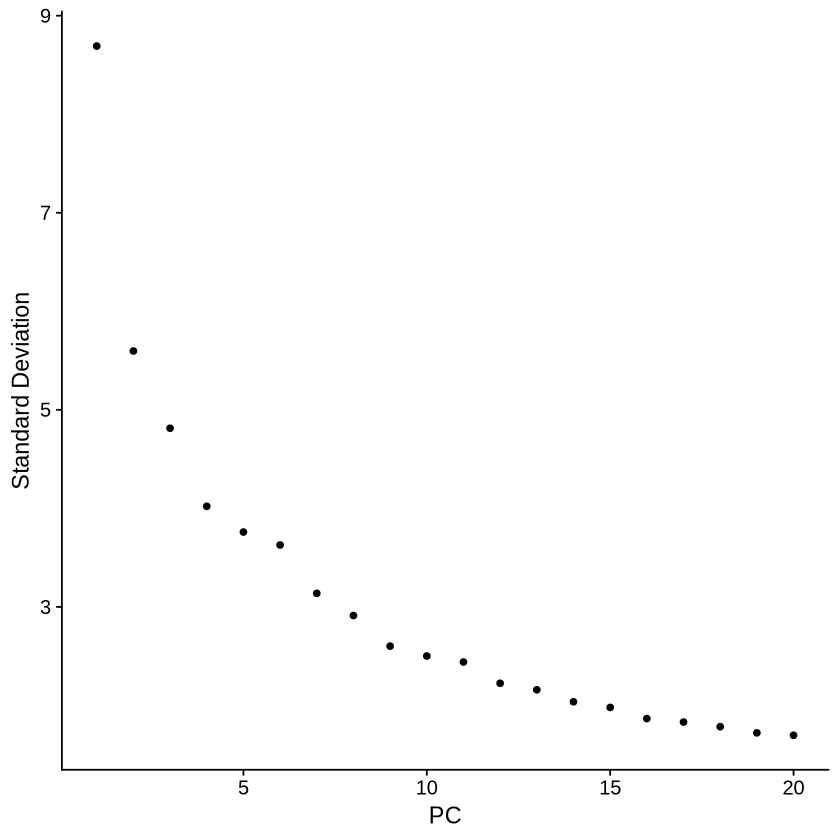

In [7]:
verbose <- F

adata <- Seurat::NormalizeData(adata,verbose = verbose)
adata <- FindVariableFeatures(adata, selection.method = "vst", nfeatures = 3000,verbose = verbose)
adata <- ScaleData(adata,verbose = verbose)
adata <- RunPCA(adata,verbose = verbose)
ElbowPlot(adata)

In [8]:
# adata@reductions$pca

In [9]:
adata@meta.data = adata@meta.data %>% mutate(
    key_harmony = parse_factor(paste(Treatment,Batch,sep='_'))
)
adata@meta.data %>% head(2) 
adata@meta.data %>% group_by(key_harmony) %>% count

,cell_id,orig.ident,nCount_RNA,nFeature_RNA,seurat_clusters_article,cell_type,MULTI_ID,Treatment,Protein,Batch,key_harmony
,<chr>,<fct>,<dbl>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<fct>
AAACCCACAGGCTATT_1,AAACCCACAGGCTATT_1,SeuratProject,9144,2176,1,IM_3,gfp-hi,Infected,no,Batch1,Infected_Batch1
AAACCCAGTCCTACGG_1,AAACCCAGTCCTACGG_1,SeuratProject,1340,694,4,IM_1,gfp-hi,Infected,no,Batch1,Infected_Batch1


key_harmony,n
<fct>,<int>
Infected_Batch1,2848
Infected_Batch2,4831
Infected_Batch3,2869
Bystander_Batch2,2220
Uninfected_Batch2,784
Bystander_Batch3,1522
Uninfected_Batch3,2027


Transposing data matrix

Initializing state using k-means centroids initialization

Harmony 1/10

Harmony 2/10

Harmony 3/10

Harmony converged after 3 iterations



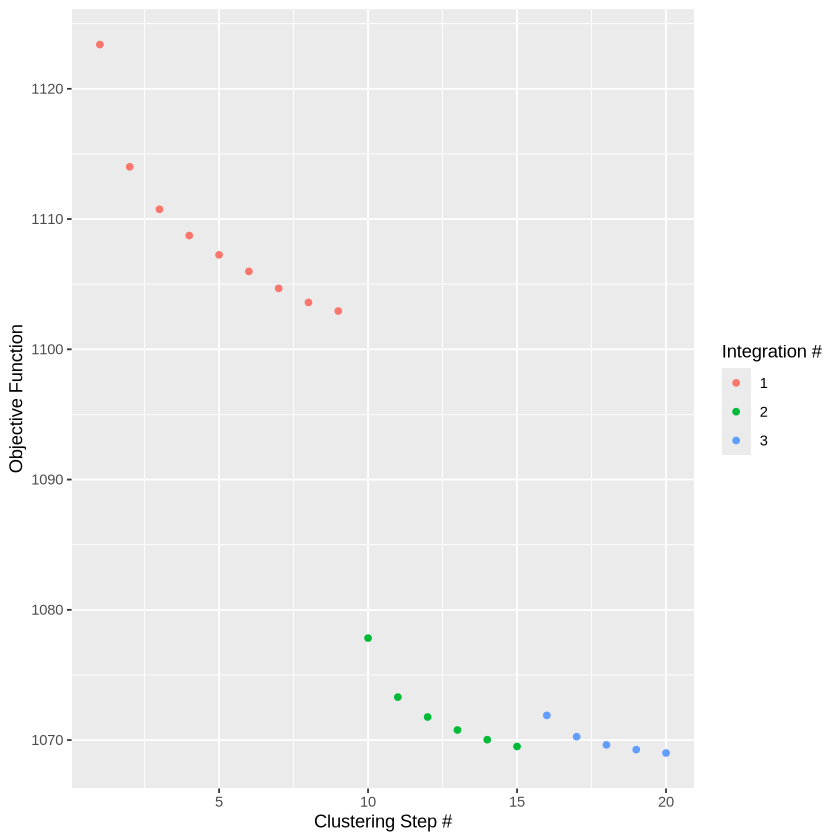

In [10]:
adata = RunHarmony(adata, "key_harmony",plot_convergence = TRUE)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”


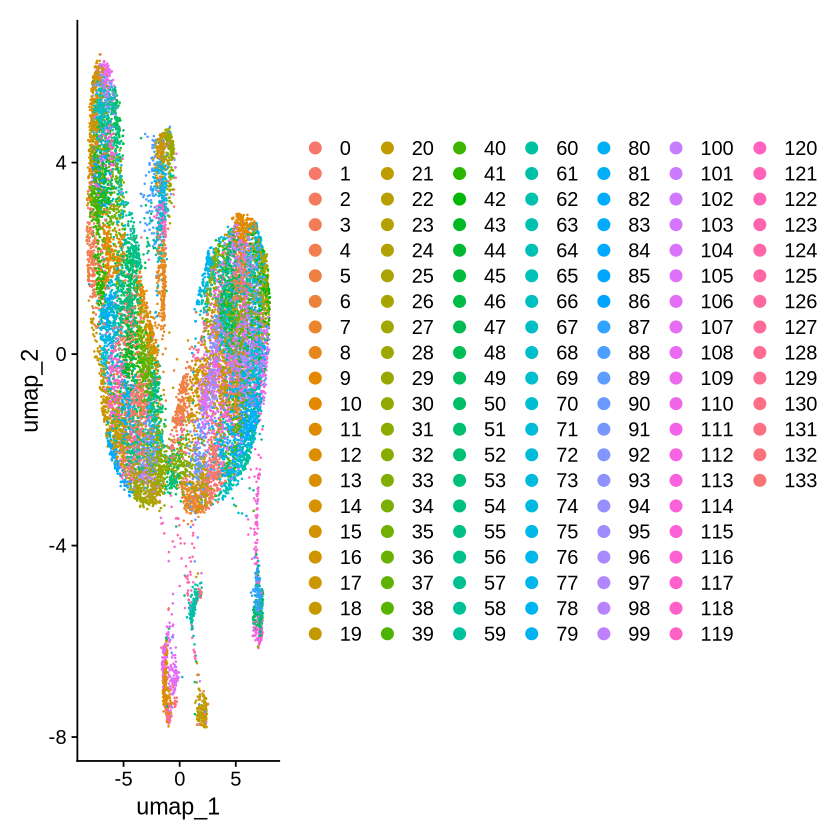

In [11]:
dims = 1:15
resolution = 0.1

adata <- RunUMAP(adata,reduction = "harmony", dims = dims,verbose = verbose)
adata <- FindNeighbors(adata, dims = dims,reduction = "harmony",verbose = verbose)
adata <- FindClusters(adata, resolution = dims,verbose = verbose,method='igraph')
DimPlot(adata, reduction = "umap")

In [12]:
adata@meta.data %>% head(2) %>% select(!matches("RNA_snn_res.+"))

,cell_id,orig.ident,nCount_RNA,nFeature_RNA,seurat_clusters_article,cell_type,MULTI_ID,Treatment,Protein,Batch,key_harmony,seurat_clusters
,<chr>,<fct>,<dbl>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<fct>,<fct>
AAACCCACAGGCTATT_1,AAACCCACAGGCTATT_1,SeuratProject,9144,2176,1,IM_3,gfp-hi,Infected,no,Batch1,Infected_Batch1,75
AAACCCAGTCCTACGG_1,AAACCCAGTCCTACGG_1,SeuratProject,1340,694,4,IM_1,gfp-hi,Infected,no,Batch1,Infected_Batch1,7


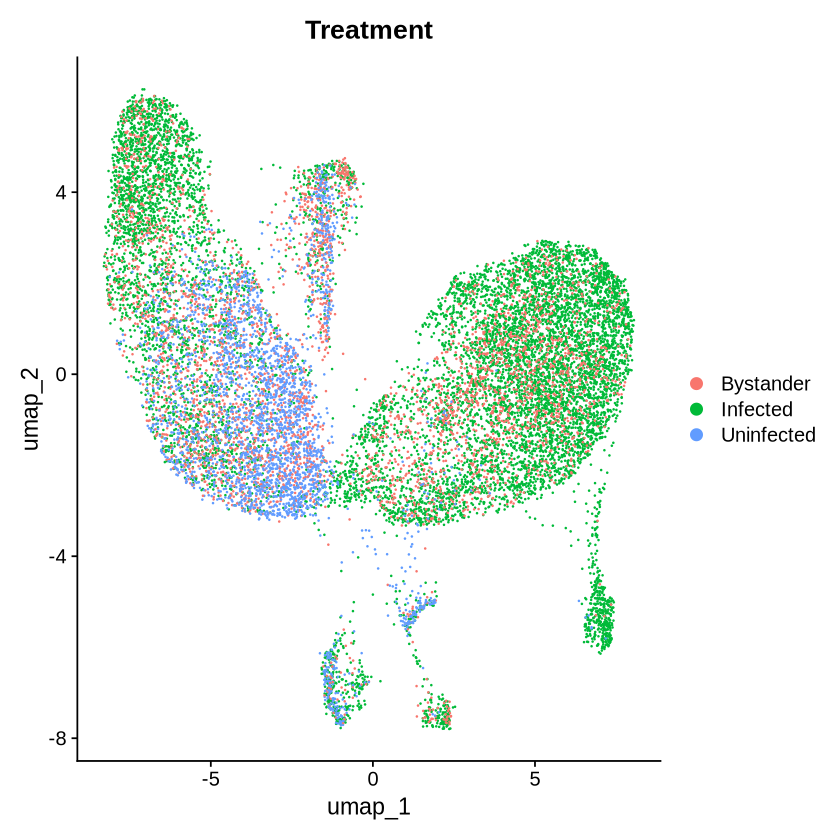

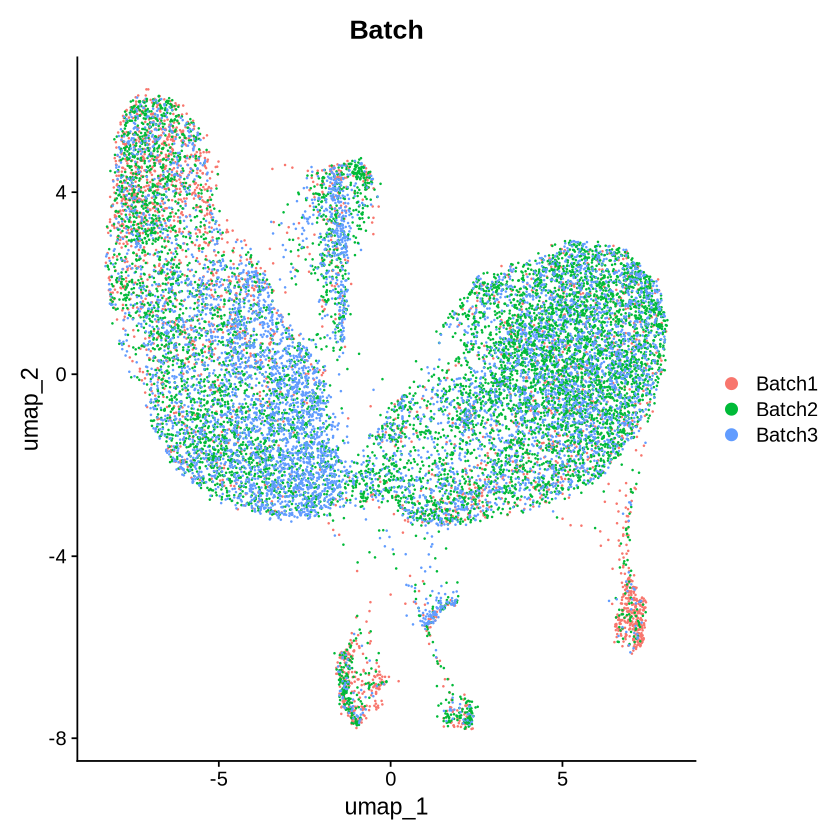

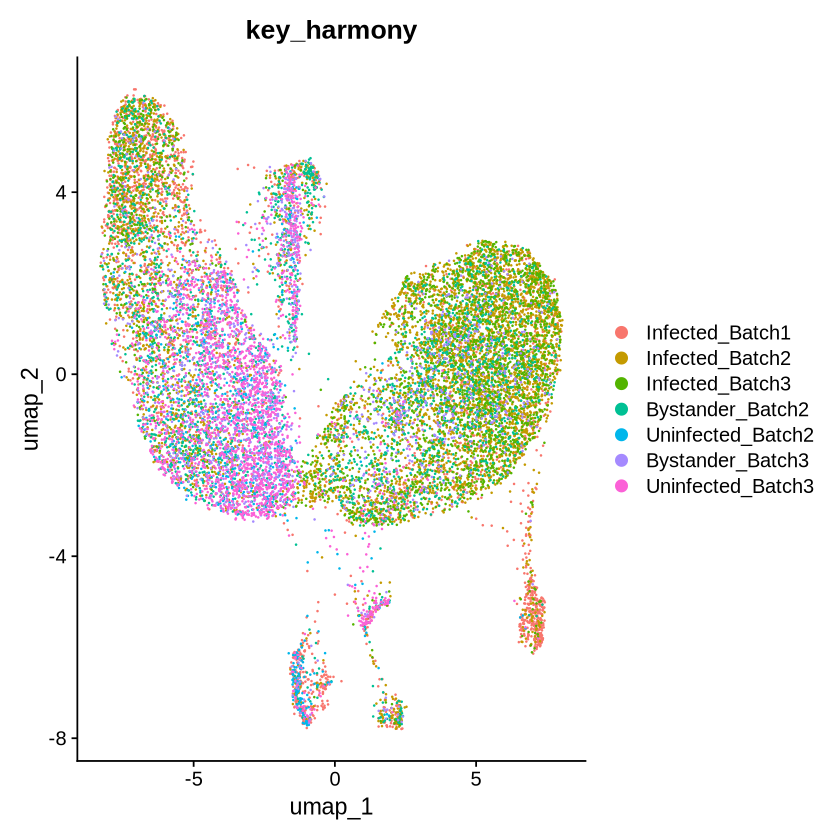

In [13]:
DimPlot(adata, reduction = "umap",group.by = 'Treatment')
DimPlot(adata, reduction = "umap",group.by = 'Batch')
DimPlot(adata, reduction = "umap",group.by = "key_harmony")

In [14]:
adata@meta.data %>%  select(!matches("RNA_snn_res.+")) %>%  head(2)
df_cell_type = read_csv("mtb_cell_type.txt") %>% mutate(
seurat_clusters_article = as.integer(seurat_clusters_article))
df_cell_type %>% head(2)

,cell_id,orig.ident,nCount_RNA,nFeature_RNA,seurat_clusters_article,cell_type,MULTI_ID,Treatment,Protein,Batch,key_harmony,seurat_clusters
,<chr>,<fct>,<dbl>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<fct>,<fct>
AAACCCACAGGCTATT_1,AAACCCACAGGCTATT_1,SeuratProject,9144,2176,1,IM_3,gfp-hi,Infected,no,Batch1,Infected_Batch1,75
AAACCCAGTCCTACGG_1,AAACCCAGTCCTACGG_1,SeuratProject,1340,694,4,IM_1,gfp-hi,Infected,no,Batch1,Infected_Batch1,7


Rows: 14 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): cell_type, sub_cell_type_1
dbl (1): seurat_clusters_article

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


cell_type,sub_cell_type_1,seurat_clusters_article
<chr>,<chr>,<int>
macrophage,AM_1,0
macrophage,IM_3,1


In [15]:
adata@meta.data = adata@meta.data %>% select(cell_id,seurat_clusters_article,Treatment,Protein,Batch) %>% 
rename(
treatment=Treatment,
protein=Protein,
batch=Batch
) %>% left_join(df_cell_type,by = 'seurat_clusters_article')
rownames(adata@meta.data) =  adata@meta.data$cell_id
adata@meta.data  %>%  head(2)

,cell_id,seurat_clusters_article,treatment,protein,batch,cell_type,sub_cell_type_1
,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>
AAACCCACAGGCTATT_1,AAACCCACAGGCTATT_1,1,Infected,no,Batch1,macrophage,IM_3
AAACCCAGTCCTACGG_1,AAACCCAGTCCTACGG_1,4,Infected,no,Batch1,macrophage,IM_1


In [16]:
adata@meta.data %>% group_by(cell_type,seurat_clusters_article) %>% count
adata@meta.data %>% group_by(sub_cell_type_1,seurat_clusters_article) %>% count

cell_type,seurat_clusters_article,n
<chr>,<int>,<int>
dendritic cell,10,171
lymphocyte,11,137
lymphocyte,12,129
lymphocyte,13,89
macrophage,0,3218
macrophage,1,2861
macrophage,2,2547
macrophage,3,1896
macrophage,4,1852


sub_cell_type_1,seurat_clusters_article,n
<chr>,<int>,<int>
AM_1,0,3218
AM_2,2,2547
AM_3,5,1843
AM_4,6,967
IM_1,4,1852
IM_2,3,1896
IM_3,1,2861
IM_4,7,536
dendritic cell,10,171


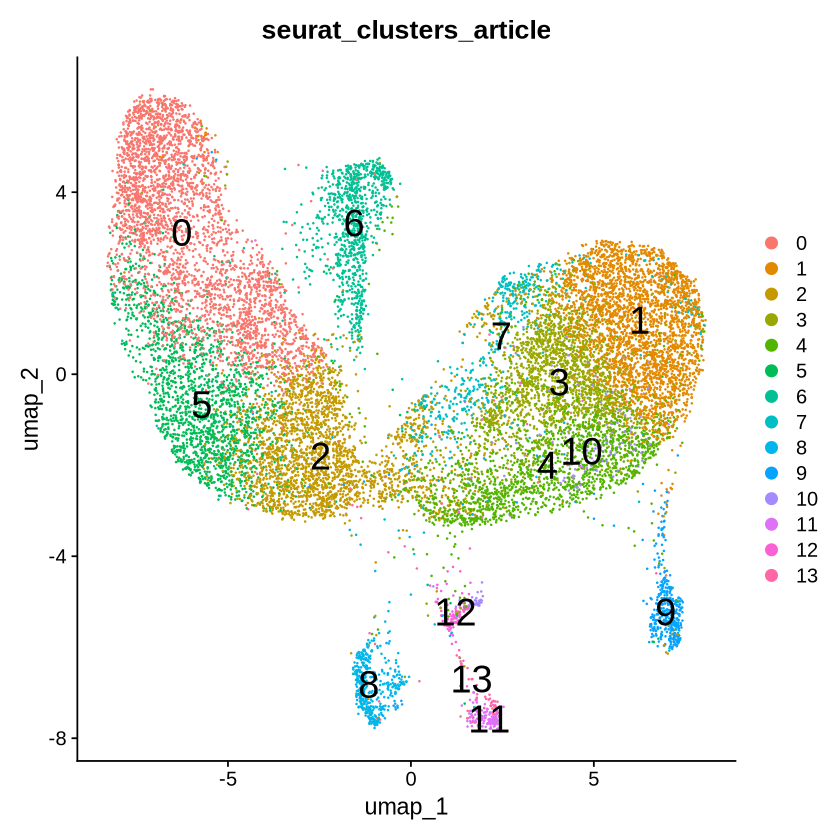

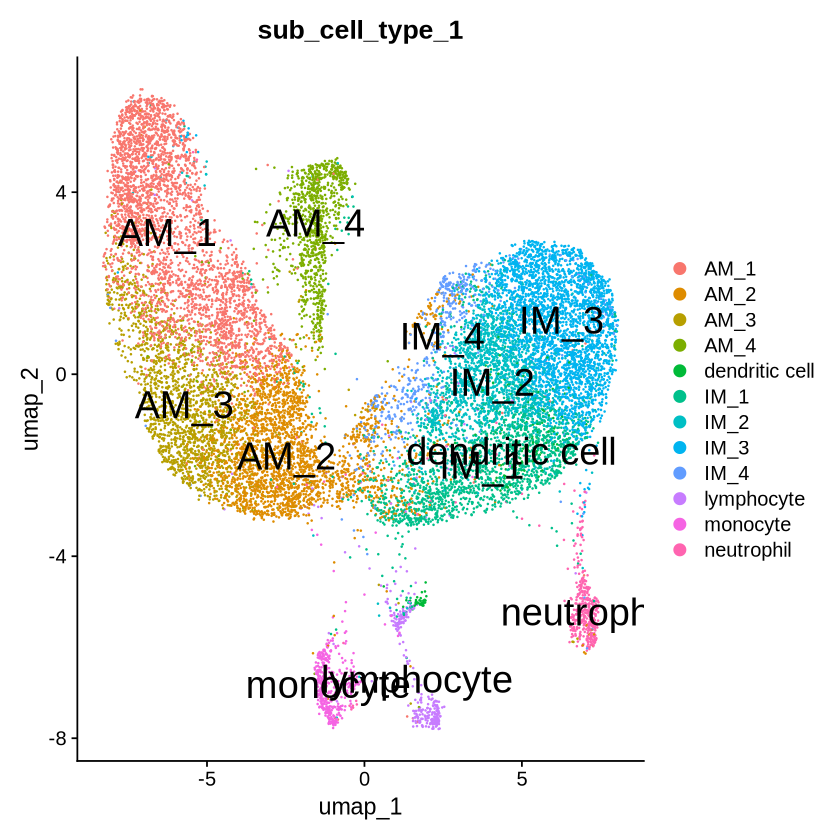

In [17]:
p = DimPlot(adata, reduction = "umap",group.by = 'seurat_clusters_article'
        ,label = T,label.size = 8)
p
ggsave('mtb_umap_seurat_clusters_article.png',p,width = 150,height = 150,units = 'mm')


p = DimPlot(adata, reduction = "umap",group.by = 'sub_cell_type_1',label = T,label.size = 8)
p
ggsave('mtb_umap_sub_cell_type_1.png',p,width = 150,height = 150,units = 'mm')

In [18]:
df_umap = adata@reductions$umap@cell.embeddings %>% as.data.frame %>% mutate(
 cell_id = rownames(adata@reductions$umap@cell.embeddings)
)
df_umap %>% head(2)
adata@meta.data %>% left_join(df_umap , by = 'cell_id') %>% write_csv("mtb_ann.csv")

,umap_1,umap_2,cell_id
,<dbl>,<dbl>,<chr>
AAACCCACAGGCTATT_1,6.774730,1.134033,AAACCCACAGGCTATT_1
AAACCCAGTCCTACGG_1,1.706974,-2.713674,AAACCCAGTCCTACGG_1


In [19]:
adata@meta.data %>% filter(treatment == "Infected") %>% group_by(sub_cell_type_1,seurat_clusters_article) %>%
count() %>%
arrange(seurat_clusters_article) %>% 
select(-n) %>% write_csv('cell_type.csv')
adata@meta.data %>% head(2)

,cell_id,seurat_clusters_article,treatment,protein,batch,cell_type,sub_cell_type_1
,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>
AAACCCACAGGCTATT_1,AAACCCACAGGCTATT_1,1,Infected,no,Batch1,macrophage,IM_3
AAACCCAGTCCTACGG_1,AAACCCAGTCCTACGG_1,4,Infected,no,Batch1,macrophage,IM_1


In [20]:
for (gourp in 8:13) {
  cat(gourp, "\n")
  p_out <- file.path("markers", sprintf("mtb_%d.csv", gourp))
  if (!file.exists(p_out)) {
    markers <- FindMarkers(adata, group.by = "seurat_clusters_article", ident.1 = gourp)
    markers %>% head()
    markers %>% dim()
    markers %>% mutate(
      gourp  = gourp,
      gene_name = rownames(markers), .before = 1
    ) %>% write_csv(p_out)
    cat(sprintf('[out] %s\n',p_out))
  }
}

8 
9 
10 
11 
12 
13 
